# Homework 5

## Question 1 (5 points)

- Read the `mpg` dataset in a `pandas` data frame.
- Execute the `describe` method of the data frame you created.
- What function in R corresponds to `describe`?

In [3]:
#!pandoc --version

In [77]:
import pandas as pd
mpg=pd.read_csv('mpg.csv')
mpg.describe()


,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


### What function in R corresponds to describe?
Summary built in function

## Question 2 (25 points)

This will make you miss the `ggplot2` library! :D

Modify the following plot

```
_ = sns.lmplot(
    data = mpg,
    x = "displ",
    y = "hwy",
    ci = None,
    line_kws = {"color": "black"},
    scatter_kws = {"s": 10},
    lowess = True,
    x_jitter = 0.5,
    y_jitter = 0.5
).set(
    title = "Fuel consumption by engine displacement",
    xlabel = "Engine displacement",
    ylabel = "Fuel consumption"
).tight_layout()
```

in such a way that:

1. the points in the plot are colored by the variable `class` in the `mpg` dataset

1. there is a single trend line applied that applies to all points in the plot instead of one trend line for each group defined by the `class` variable in the `mpg` dataset.

Hint:
- First, create a `lmplot` and set in that plot `hue = "class"` (to color the points by the "class" variable) and `fit_reg = False` (to suppress the trend line); assign the output of the `lmplot` function to a variable named `lm_plot` (you'll need this in a second).
- Next, in the same cell, create a `regplot` and set `scatter = False` (to suppress plotting the points, which are already produced by the previous plot) as well as `ax = lm_plot.ax` (to tell `seaborn` to overlay the new plot to the previous one, rather than creating a new plot).
- You should still pass relevant parameters to each of the two components of the plot (`lmplot` and `regplot`) in a sensible way so to get the desired final plot as the result.

Here's a "skeleton" of the code that you'll need. It's up to you to fill it out!

```
lm_plot = sns.lmplot(
    ... <- configure the lmplot appropriately
).set(
    title = "Fuel consumption by engine displacement",
    xlabel = "Engine displacement",
    ylabel = "Fuel consumption"
).tight_layout()

_ = sns.regplot(
    ... <- configure the regplot appropriately
)
```

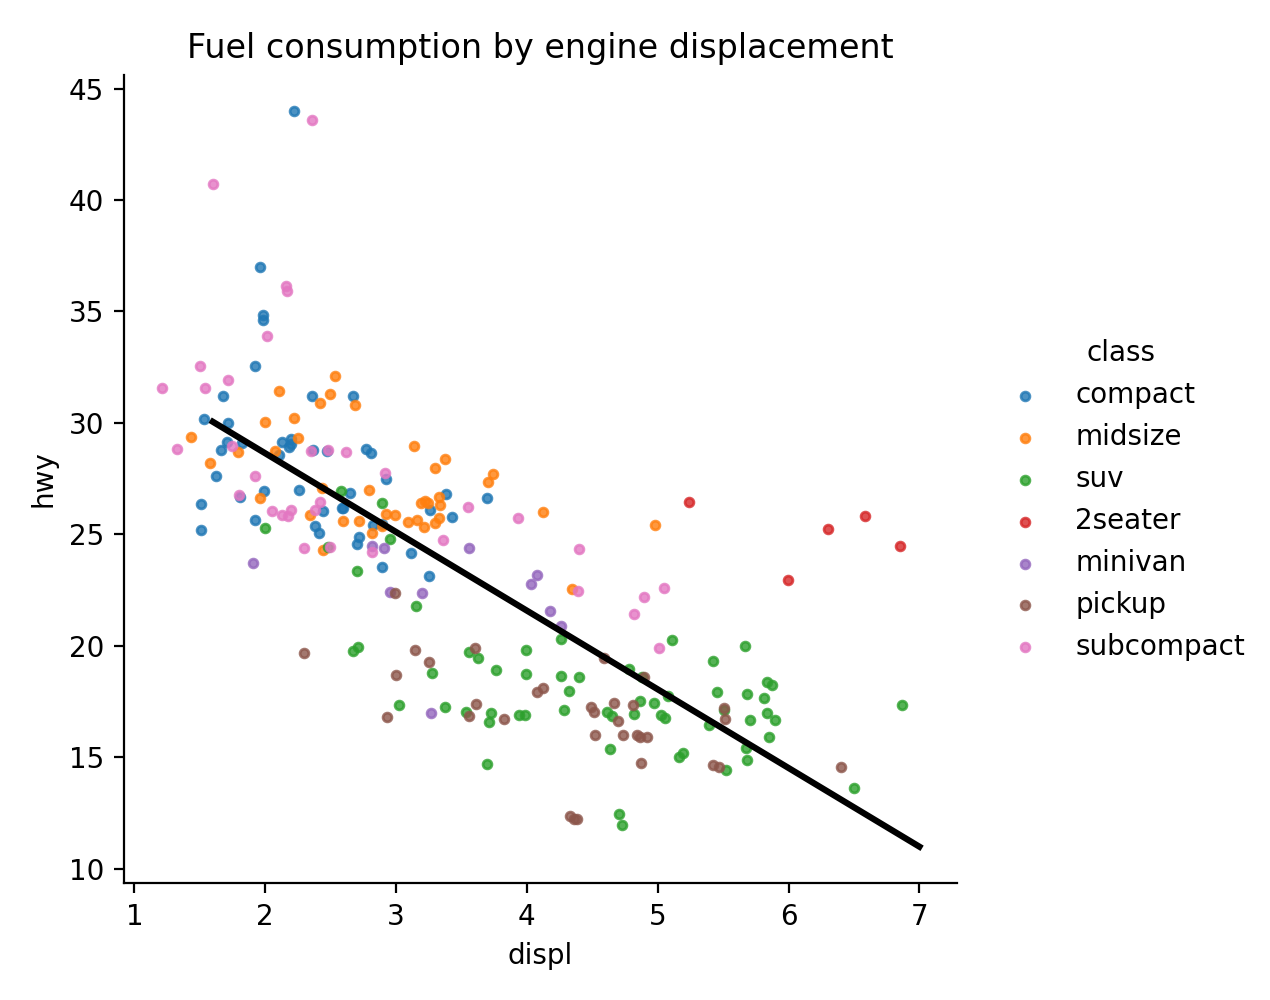

In [78]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
lm_plot = sns.lmplot(
    data = mpg,
    x = "displ",
    y = "hwy",
    ci = None,
    line_kws = {"color": "black"},
    scatter_kws = {"s": 10},
    hue="class",
    fit_reg=False,
    lowess = True,
    x_jitter = 0.5,
    y_jitter = 0.5
).set(
    title = "Fuel consumption by engine displacement",
    xlabel = "Engine displacement",
    ylabel = "Fuel consumption"
).tight_layout()
s=sns.regplot(
    data = mpg,
    x = "displ",
    y = "hwy",
    scatter=False,
    line_kws = {"color": "black"},
    ax=lm_plot.ax,ci=None
)
plt.show()

In [ ]:
#!pip install seaborn==0.12.2

## Question 3 (20 points)

Use the `plotnine` library to recreate this `ggplot2` plot (from lab 1) in Python:

```
ggplot(data = diamonds, mapping = aes(x = color, fill = clarity)) +
  geom_bar(position = "dodge") +
  scale_fill_brewer(palette = "Set2") +
  labs(
    x = "Color",
    y = element_blank(),
    fill = "Diamond clarity",
    title = "Clarity distribution by color"
  )
```

Hint: [this stackoverflow](https://stackoverflow.com/questions/49531655/issue-using-qualitative-brewer-palettes-in-plotnine) discussion might come in handy to set the palette colors. Also, note that the variable `clarity` is actually an ordered categorical variable (to see this, read the docs in R for the `diamonds` dataset with `? diamonds`). We can create a `pandas` equivalent of an R factor by using the `pandas.Categorical` class (see the docs [here](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html)). To get the same ordering that we got in R for the dodged bars, you will need to transform the `clarity` variable in the `diamonds` dataset that you read with `pandas` to a `pandas.Categorical` variable.

In [4]:
#!pip install plotnine

In [6]:
from plotnine import *
import pandas as pd

In [7]:
diamonds=pd.read_csv('diamonds.csv')

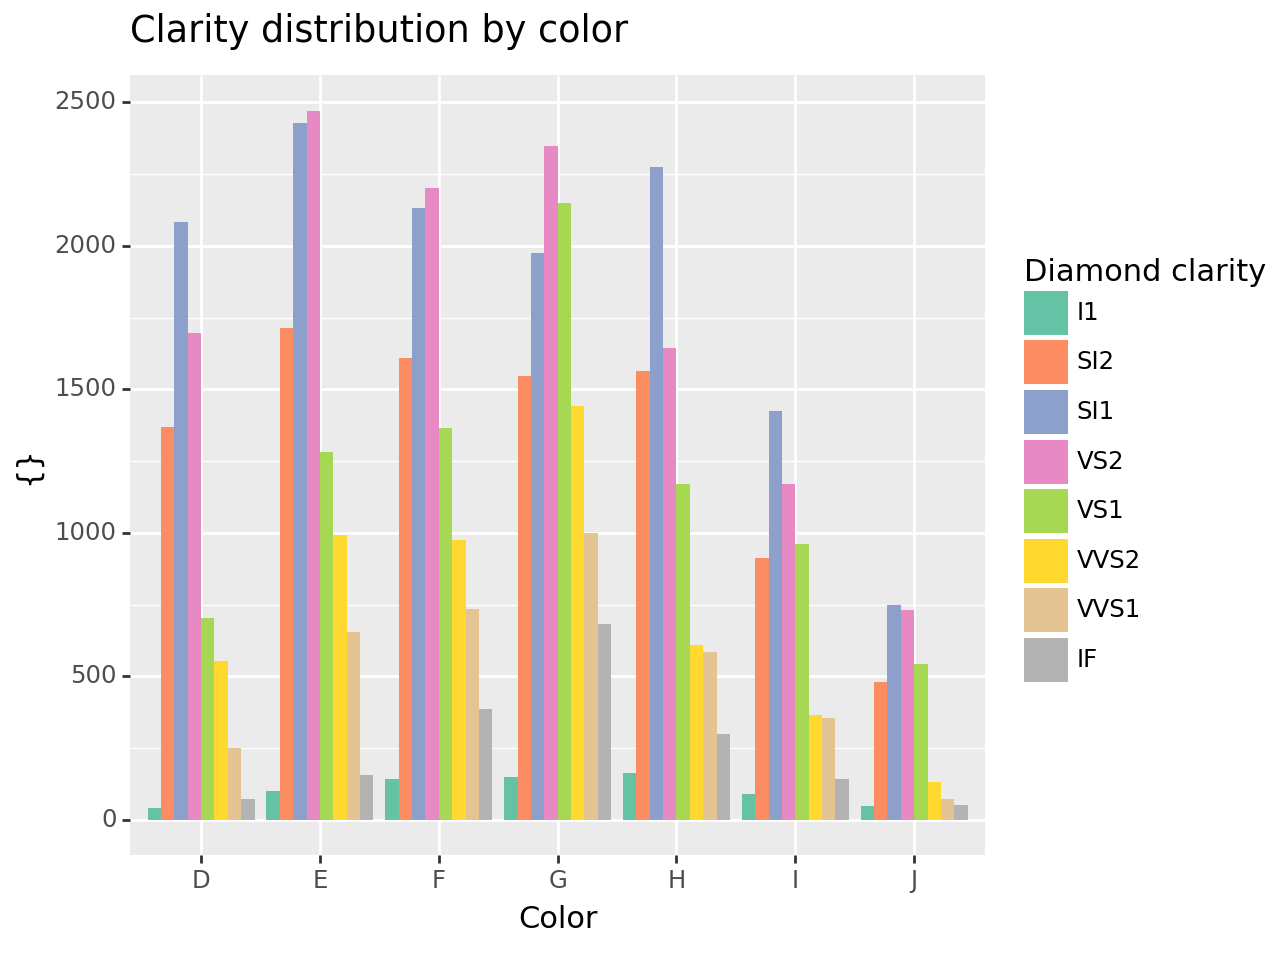

<Figure Size: (640 x 480)>

In [24]:
# Define the desired order for clarity levels
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
diamonds['clarity'] = pd.Categorical(diamonds['clarity'], categories=clarity_order, ordered=True)

(ggplot(data = diamonds, mapping = aes(x = 'color', fill = 'clarity')) +
  geom_bar(position = "dodge") +
  scale_fill_brewer(type="qual", palette = "Set2") +
  labs(
    x = "Color",
    y = element_blank(),
    fill = "Diamond clarity",
    title = "Clarity distribution by color"
  ))

In [6]:
#!pip install plotnine

## Question 4 (25 points)

Solve again exercises 1 and 4  of Homework 2, but this time use `pandas`!

You are encouraged to use the published solutions of Homework 2 and "translate" them from R's `tidyverse`/`dplyr` to Python's `pandas`.

You might find this ["translation guide"](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html) helpful!

In [40]:
# Load the flights and airlines datasets (assuming you have them as CSV files)
flights = pd.read_csv('flights.csv')  # Replace with your dataset filename
airlines = pd.read_csv('airlines.csv')  # Replace with your dataset filename

# Filter flights that occurred between July and November
flights = flights[(flights['month'] >= 7) & (flights['month'] <= 11)]

# Calculate the gain
flights['gain'] = flights['arr_delay'] - flights['dep_delay']

# Group by airline and compute average gain (ignoring NAs)
#Note: missing values are automatically skipped when calculating the mean. You do not need to specify a parameter to skip them.
average_gain = flights.groupby('carrier')['gain'].mean().reset_index()

# Sort by average_gain in decreasing order
average_gain = average_gain.sort_values(by='gain', ascending=False)

# Join with the airlines dataset
average_gain = average_gain.merge(airlines, left_on='carrier', right_on='carrier', how='left')

result_tibble = average_gain[['gain', 'name']]
# Rename the columns to match the R solution
result_tibble.columns = ['average_gain', 'name']

# Display the resulting tibble
print(result_tibble)


    average_gain                         name
0       1.285235  AirTran Airways Corporation
1       0.545455       Frontier Airlines Inc.
2       0.063590                    Envoy Air
3      -0.909774       Hawaiian Airlines Inc.
4      -2.837182              US Airways Inc.
5      -2.846154        SkyWest Airlines Inc.
6      -3.017921           Mesa Airlines Inc.
7      -4.905070              JetBlue Airways
8      -5.787007     ExpressJet Airlines Inc.
9      -7.960461         Delta Air Lines Inc.
10     -8.571100       Southwest Airlines Co.
11     -8.669899       American Airlines Inc.
12     -9.621162        United Air Lines Inc.
13     -9.875375               Virgin America
14    -10.288170            Endeavor Air Inc.
15    -22.211409         Alaska Airlines Inc.


In [44]:
# Read the transactions.csv dataset
transactions = pd.read_csv("transactions.csv")

# Reshape the data to be tidy
transactions = pd.melt(transactions, id_vars=['person', 'month'], var_name='transaction_type', value_name='amount')

# Filter the data for Jenna or John
transactions = transactions[transactions['person'].isin(['jenna', 'john'])]

# Get the unique months in which either Jenna or John had a transaction
unique_months = transactions['month'].unique()

# Create a pandas DataFrame with the unique months
result_tibble = pd.DataFrame({'month': unique_months})

# Display the resulting tibble
print(result_tibble)


   month
0      1
1      3


## Question 5 (25 points)

Solve again exercises 1 and 2 of Homework 3, but this time use `pandas`!

You are encouraged to use the published solutions of Homework 3 and "translate" them from R's `tidyverse`/`dplyr` to Python's `pandas`.

Again, you might find this ["translation guide"](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html) helpful!

In [53]:
# Read the datasets
dinners = pd.read_csv("dinners.csv")
drinks = pd.read_csv("drinks.csv")
food = pd.read_csv("food.csv")
persons = pd.read_csv("persons.csv")

# Merge the datasets to create the dinners_explicit tibble
dinners_explicit = pd.merge(dinners, drinks, left_on="drink_id", right_on="item_id", how="left")
dinners_explicit = dinners_explicit.rename(columns={"price": "drink_price", "item_name": "drink"})

dinners_explicit = pd.merge(dinners_explicit, food, left_on="food_id", right_on="food_id", how="left")
dinners_explicit = dinners_explicit.rename(columns={"price": "food_price", "name": "food"})

dinners_explicit = pd.merge(dinners_explicit, persons, left_on="person_id", right_on="id", how="left")

# Select the specified columns
dinners_explicit = dinners_explicit[["drink", "drink_price", "food", "food_price", "first_name", "last_name", "age"]]

# Display the resulting tibble
dinners_explicit

,drink,drink_price,food,food_price,first_name,last_name,age
0,NaN,NaN,pasta,$8.50,Valter,Evangelista,34.0
1,NaN,NaN,ice cream,$4.50,Polly,Verity,61.0
2,water,$1.00,NaN,NaN,NaN,NaN,NaN
3,beer,$5.00,cake,$4.50,Aysha,Freitas,55.0
4,NaN,NaN,pizza,$12,Rayno,Van Kann,29.0
5,water,$1.00,fish,$15.00,Valter,Evangelista,34.0
6,NaN,NaN,pizza,$12,Rayno,Van Kann,29.0
7,sparkling water,$2.00,ice cream,$4.50,Ksenya,Dunai,31.0
8,soda,$2.50,pop corn,$1.50,Polly,Verity,61.0
9,water,$1.00,salad,$5.00,Aysha,Freitas,55.0


In [81]:
# Assuming you have the 'dinners_explicit' DataFrame from the previous steps

# Create a summary tibble for the two most popular drinks
top2_drinks = dinners_explicit['drink'].value_counts().reset_index()
top2_drinks.columns = ['drink', 'n']
top2_drinks = top2_drinks.head(2)

# Create a summary tibble for the two most popular foods
top2_foods = dinners_explicit['food'].value_counts().reset_index()
top2_foods.columns = ['food', 'n']
top2_foods = top2_foods.head(2)

# Display the summary tibbles
print("Top 2 Drinks:")
top2_drinks




Top 2 Drinks:


,drink,n
0,soda,9
1,sparkling water,8


In [82]:
print("\nTop 2 Foods:")
top2_foods


Top 2 Foods:


,food,n
0,pizza,7
1,fries,6


In [5]:
#!pip install nbconvert